In [1]:
import configparser, os, sys

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiser

config = "bruz"
if config == "ur1":
    sys.path.insert(0, "../")
    siepelDir = "C:/Users/pleroy/Documents/CAMILL/SER/WR15_v2"
elif config == "bruz":
    sys.path.insert(0, "/home/pleroy/DEV/DIADEM")
    siepelDir = "/home/pleroy/DATA/CAMILL/WR15_v2"

import toolsdiadem.tools as dia
import toolsdiadem.ser as ser
from toolsdiadem.ConfigSer import ConfigSer
from toolsdiadem.Gate import Gate
from toolsdiadem.Probe import Probe

In [2]:
def addVLine(x, absorber, c="gray"):
    plt.axvline(x=x, label=f"line at {x} ({absorber})", c=c)

In [3]:
#%matplotlib qt5
%load_ext autoreload
%autoreload 2

In [4]:
cmap='jet'
configFilenameWr15 = os.path.join(siepelDir, "wr15_plaqueSupport.ini")
configFilenameWr10 = os.path.join(siepelDir, "wr10_plaqueSupport.ini")
conf15 = ConfigSer(configFilenameWr15)
conf10 = ConfigSer(configFilenameWr10)
conf15.printConfig()
conf10.printConfig()

iWR15 = 20
iWR10 = 21

vmin = -90
vmax = -40
cmap='jet'

centerFreqWR15 = 62.5
bandWidthWR15 = 12.4
centerFreqWR10 = 92.5
bandWidthWR10 = 17.4

/home/pleroy/DATA/CAMILL/WR15_v2/wr15_plaqueSupport.ini
nb_elev 41
nb_freq 2001
nb_ssb 3
el0 0.7
az0 -0.44
base_path /home/pleroy/DATA/CAMILL/WR15_v2
out_path /home/pleroy/DATA/CAMILL/WR15_v2/processing/wr15
gateWidth 500.0
gateCenter 6450.0
/home/pleroy/DATA/CAMILL/WR15_v2/wr10_plaqueSupport.ini
nb_elev 41
nb_freq 2801
nb_ssb 4
el0 0.65
az0 -0.44
base_path /home/pleroy/DATA/CAMILL/WR15_v2
out_path /home/pleroy/DATA/CAMILL/WR15_v2/processing/wr10
gateWidth 500.0
gateCenter 6450.0


# WR15

In [5]:
file_f2c_wr15 = os.path.join(conf15.out_path, "data", "WR15_S11_fond_de_chambre.txt")
tmp = np.loadtxt(file_f2c_wr15, skiprows=1)
print(file_f2c_wr15)
S11_f2c_wr15 = tmp[:,1] + 1j * tmp[:,2]

file_ref = os.path.join(conf15.out_path, "data", "WR15_S11_plaque_ref.txt")
tmp = np.loadtxt(file_ref, skiprows=1)
print(file_ref)
S11_ref_wr15 = tmp[:, 1] + 1j * tmp[:, 2]

probe = Probe(os.path.join(conf15.base_path, "S11FDC_WR15.s1p"))
probe_2020_08_19 = Probe(os.path.join(conf15.base_path, "S11_PROBE_WR15_2020_08_19.s1p"))
probe_SUPPORT_AU_MAX_PLUS_ABS = Probe(os.path.join(conf15.base_path, "S11_SUPPORT_AU_MAX_PLUS_ABS_2020_08_19.s1p"))
probe_SUPPORT_AU_MAX_SANS_ABS = Probe(os.path.join(conf15.base_path, "S11_SUPPORT_AU_MAX_SANS_ABS_2020_08_19.s1p"))
probe_SUPPORT_A_ZERO_SANS_ABS = Probe(os.path.join(conf15.base_path, "S11_SUPPORT_A_ZERO_SANS_ABS_2020_08_19.s1p"))

S11_prb_wr15 = probe_2020_08_19.S11

/home/pleroy/DATA/CAMILL/WR15_v2/processing/wr15/data/WR15_S11_fond_de_chambre.txt
/home/pleroy/DATA/CAMILL/WR15_v2/processing/wr15/data/WR15_S11_plaque_ref.txt


In [6]:
dir_J_wr15 = os.path.join(conf15.base_path, "20200703", "012_J")
dir_N_wr15 = os.path.join(conf15.base_path, "20200703", "014_N")
dir_O_wr15 = os.path.join(conf15.base_path, "20200703", "013_O")
freq_wr15, S11_J_wr15 = ser.getData_ssb(conf15.nb_elev, conf15.nb_freq, conf15.nb_ssb, dir_J_wr15)
freq_wr15, S11_N_wr15 = ser.getData_ssb(conf15.nb_elev, conf15.nb_freq, conf15.nb_ssb, dir_N_wr15)
freq_wr15, S11_O_wr15 = ser.getData_ssb(conf15.nb_elev, conf15.nb_freq, conf15.nb_ssb, dir_O_wr15)

d_wr15 = np.linspace(0, 300 / (freq_wr15[1] - freq_wr15[0]), conf15.nb_freq) * 0.5

In [7]:
s11_J_wr15 = np.fft.ifft(S11_J_wr15, axis=1)
s11_minus_f2c_J_wr15 = np.fft.ifft(S11_J_wr15 - S11_f2c_wr15, axis=1)

s11_N_wr15 = np.fft.ifft(S11_N_wr15, axis=1)
s11_minus_f2c_N_wr15 = np.fft.ifft(S11_N_wr15 - S11_f2c_wr15, axis=1)

s11_O_wr15 = np.fft.ifft(S11_O_wr15, axis=1)
s11_minus_f2c_O_wr15 = np.fft.ifft(S11_O_wr15 - S11_f2c_wr15, axis=1)

s11_ref_wr15 = np.fft.ifft(S11_ref_wr15)

Text(0.5, 1.0, 'WR15, élévation 0.7°')

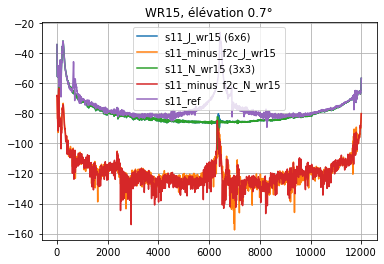

In [8]:
idx = iWR15

plt.figure()
plt.plot(d_wr15, ser.dB(s11_J_wr15[idx, :]), label="s11_J_wr15 (6x6)")
plt.plot(d_wr15, ser.dB(s11_minus_f2c_J_wr15[idx, :]), label="s11_minus_f2c_J_wr15")

plt.plot(d_wr15, ser.dB(s11_N_wr15[idx, :]), label="s11_N_wr15 (3x3)")
plt.plot(d_wr15, ser.dB(s11_minus_f2c_N_wr15[idx, :]), label="s11_minus_f2c_N_wr15")

plt.plot(d_wr15, ser.dB(s11_ref_wr15), label="s11_ref")

plt.legend()
plt.grid()
plt.title(f"WR15, élévation {conf15.elevation[idx]}°")

(6000.0, 7000.0)

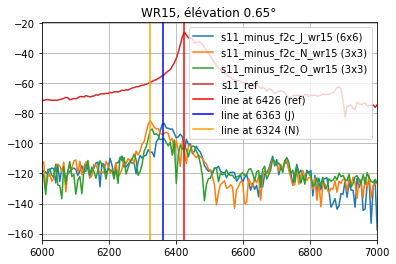

In [9]:
idx = iWR15

plt.figure()

plt.plot(d_wr15, ser.dB(s11_minus_f2c_J_wr15[idx, :]), label="s11_minus_f2c_J_wr15 (6x6)")
plt.plot(d_wr15, ser.dB(s11_minus_f2c_N_wr15[idx, :]), label="s11_minus_f2c_N_wr15 (3x3)")
plt.plot(d_wr15, ser.dB(s11_minus_f2c_O_wr15[idx, :]), label="s11_minus_f2c_O_wr15 (3x3)")

plt.plot(d_wr15, ser.dB(s11_ref_wr15), label="s11_ref")

addVLine(6426, "ref", "red")
addVLine(6363, "J", "blue")
addVLine(6324, "N", "orange")

plt.legend()
plt.grid()
plt.title(f"WR15, élévation {conf10.elevation[idx]:.2f}°")

plt.xlim([6000, 7000])

# WR10

In [10]:
file_f2c_wr10 = os.path.join(conf10.out_path, "data", "S11_fond_de_chambre.txt")
tmp = np.loadtxt(file_f2c_wr10, skiprows=1)
print(file_f2c_wr10)
S11_f2c_wr10 = tmp[:,1] + 1j * tmp[:,2]

file_ref_wr10 = os.path.join(conf10.out_path, "data", "S11_plaque_ref_from_scan.txt")
tmp = np.loadtxt(file_ref_wr10, skiprows=1)
print(file_ref_wr10)
S11_ref_wr10 = tmp[:, 1] + 1j * tmp[:, 2]

tmp = np.loadtxt(os.path.join(conf10.out_path, "data", "S11_probe_interpolated.txt"), skiprows=1)
S11_prb_wr10 = tmp[:,1] + 1j * tmp[:,2]
freq_prb_wr10 = tmp[:,0]

/home/pleroy/DATA/CAMILL/WR15_v2/processing/wr10/data/S11_fond_de_chambre.txt
/home/pleroy/DATA/CAMILL/WR15_v2/processing/wr10/data/S11_plaque_ref_from_scan.txt


In [11]:
dir_J_wr10 = os.path.join(conf15.base_path, "20200716", "049_J")
dir_N_wr10 = os.path.join(conf15.base_path, "20200715", "047_N")
dir_O_wr10 = os.path.join(conf15.base_path, "20200715", "046_O")
freq_wr10, S11_J_wr10 = ser.getData_ssb(conf10.nb_elev, conf10.nb_freq, conf10.nb_ssb, dir_J_wr10, tag="WR10_")
freq_wr10, S11_N_wr10 = ser.getData_ssb(conf10.nb_elev, conf10.nb_freq, conf10.nb_ssb, dir_N_wr10, tag="WR10_")
freq_wr10, S11_O_wr10 = ser.getData_ssb(conf10.nb_elev, conf10.nb_freq, conf10.nb_ssb, dir_O_wr10, tag="WR10_")

d_wr10 = np.linspace(0, 300 / (freq_wr10[1] - freq_wr10[0]), conf10.nb_freq) * 0.5

In [12]:
s11_J_wr10 = np.fft.ifft(S11_J_wr10, axis=1)
s11_minus_f2c_J_wr10 = np.fft.ifft(S11_J_wr10 - S11_f2c_wr10, axis=1)

s11_N_wr10 = np.fft.ifft(S11_N_wr10, axis=1)
s11_minus_f2c_N_wr10 = np.fft.ifft(S11_N_wr10 - S11_f2c_wr10, axis=1)

s11_O_wr10 = np.fft.ifft(S11_O_wr10, axis=1)
s11_minus_f2c_O_wr10 = np.fft.ifft(S11_O_wr10 - S11_f2c_wr10, axis=1)

s11_ref_wr10 = np.fft.ifft(S11_ref_wr10)
s11_minus_f2c_ref_wr10 = np.fft.ifft(S11_ref_wr10 - S11_f2c_wr10)

s11_ref_wr10 = np.fft.ifft(S11_ref_wr10)

Text(0.5, 1.0, 'WR10, élévation 0.70°')

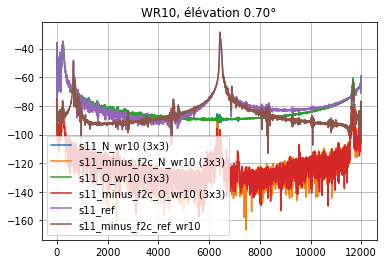

In [13]:
idx = iWR10

plt.plot(d_wr10, ser.dB(s11_N_wr10[idx, :]), label="s11_N_wr10 (3x3)")
plt.plot(d_wr10, ser.dB(s11_minus_f2c_N_wr10[idx, :]), label="s11_minus_f2c_N_wr10 (3x3)")

plt.plot(d_wr10, ser.dB(s11_O_wr10[idx, :]), label="s11_O_wr10 (3x3)")
plt.plot(d_wr10, ser.dB(s11_minus_f2c_O_wr10[idx, :]), label="s11_minus_f2c_O_wr10 (3x3)")

plt.plot(d_wr10, ser.dB(s11_ref_wr10), label="s11_ref")
plt.plot(d_wr10, ser.dB(s11_minus_f2c_ref_wr10), label="s11_minus_f2c_ref_wr10")

plt.legend()
plt.grid()
plt.title(f"WR10, élévation {conf10.elevation[idx]:.2f}°")

(6000.0, 7000.0)

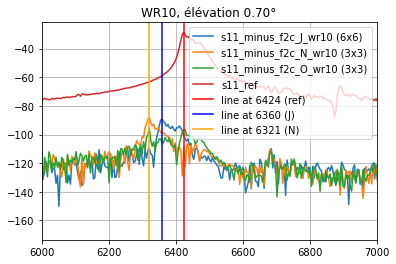

In [14]:
idx = iWR10

plt.figure()

plt.plot(d_wr10, ser.dB(s11_minus_f2c_J_wr10[idx, :]), label="s11_minus_f2c_J_wr10 (6x6)")
plt.plot(d_wr10, ser.dB(s11_minus_f2c_N_wr10[idx, :]), label="s11_minus_f2c_N_wr10 (3x3)")
plt.plot(d_wr10, ser.dB(s11_minus_f2c_O_wr10[idx, :]), label="s11_minus_f2c_O_wr10 (3x3)")

plt.plot(d_wr10, ser.dB(s11_ref_wr10), label="s11_ref")

addVLine(6424, "ref", "red")
addVLine(6360, "J", "blue")
addVLine(6321, "N", "orange")

plt.legend()
plt.grid()
plt.title(f"WR10, élévation {conf10.elevation[idx]:.2f}°")

plt.xlim([6000, 7000])

# WR15 WR10

In [15]:
freq_wr1510 = np.r_[freq_wr15, freq_wr10[1:]]
d_wr1510 = np.linspace(0, 300 / (freq_wr1510[1] - freq_wr1510[0]), conf15.nb_freq + conf10.nb_freq - 1) * 0.5

In [16]:
S11_J_wr1510 = np.r_[S11_J_wr15[iWR15, :], S11_J_wr10[iWR10, 1:]]
S11_f2c_wr1510 = np.r_[S11_f2c_wr15, S11_f2c_wr10[1:]]
S11_ref_wr1510 = np.r_[S11_ref_wr15, S11_ref_wr10[1:]]
S11_prb_wr1510 = np.r_[S11_prb_wr15, S11_prb_wr10[1:]]

In [17]:
s11_J_wr1510 = np.fft.ifft(S11_J_wr1510)
s11_minus_f2c_J_wr1510 = np.fft.ifft(S11_J_wr1510 - S11_f2c_wr1510)
s11_minus_prb_J_wr1510 = np.fft.ifft(S11_J_wr1510 - S11_prb_wr1510)
s11_ref_wr1510 = np.fft.ifft(S11_ref_wr1510)

Text(0.5, 1.0, 'WR10 J, élévation 0.70°')

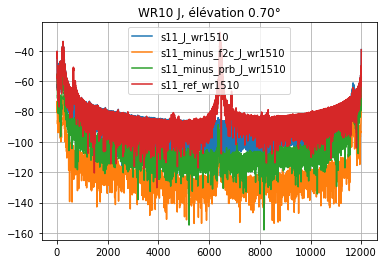

In [21]:
plt.figure()
plt.plot(d_wr1510, ser.dB(s11_J_wr1510), label="s11_J_wr1510")
plt.plot(d_wr1510, ser.dB(s11_minus_f2c_J_wr1510), label="s11_minus_f2c_J_wr1510")
plt.plot(d_wr1510, ser.dB(s11_minus_prb_J_wr1510), label="s11_minus_prb_J_wr1510")

plt.plot(d_wr1510, ser.dB(s11_ref_wr1510), label="s11_ref_wr1510")

plt.legend()
plt.grid()
plt.title(f"WR10 J, élévation {conf10.elevation[idx]:.2f}°")

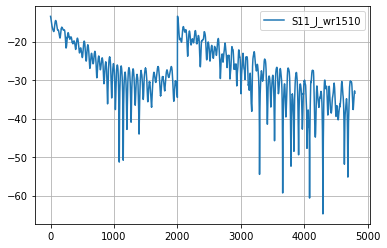

In [23]:
plt.figure()
plt.plot(ser.dB(S11_J_wr1510), label="S11_J_wr1510")
plt.legend()
plt.grid()

Text(0.5, 1.0, 'WR10 J')

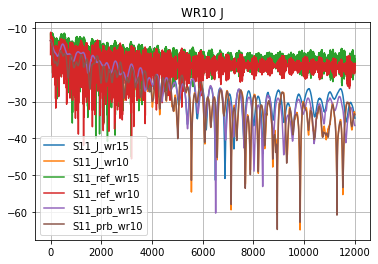

In [25]:
plt.figure()
plt.plot(d_wr15, ser.dB(S11_J_wr15[iWR15, :]), label="S11_J_wr15")
plt.plot(d_wr10, ser.dB(S11_J_wr10[iWR10, :]), label="S11_J_wr10")

plt.plot(d_wr15, ser.dB(S11_ref_wr15), label="S11_ref_wr15")
plt.plot(d_wr10, ser.dB(S11_ref_wr10), label="S11_ref_wr10")

plt.plot(d_wr15, ser.dB(S11_prb_wr15), label="S11_prb_wr15")
plt.plot(d_wr10, ser.dB(S11_prb_wr10), label="S11_prb_wr10")

plt.legend()
plt.grid()
plt.title(f"WR10 J")

Text(0.5, 1.0, 'WR1510 J')

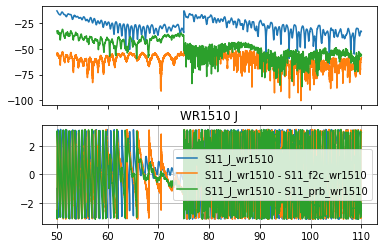

In [27]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

ax0.plot(freq_wr1510, ser.dB(S11_J_wr1510), label="S11_J_wr1510")
ax0.plot(freq_wr1510, ser.dB(S11_J_wr1510 - S11_f2c_wr1510), label="S11_J_wr1510 - S11_f2c_wr1510")
ax0.plot(freq_wr1510, ser.dB(S11_J_wr1510 - S11_prb_wr1510), label="S11_J_wr1510 - S11_prb_wr1510")

ax1.plot(freq_wr1510, np.angle(S11_J_wr1510), label="S11_J_wr1510")
ax1.plot(freq_wr1510, np.angle(S11_J_wr1510 - S11_f2c_wr1510), label="S11_J_wr1510 - S11_f2c_wr1510")
ax1.plot(freq_wr1510, np.angle(S11_J_wr1510 - S11_prb_wr1510), label="S11_J_wr1510 - S11_prb_wr1510")

plt.legend()
plt.grid()
plt.title(f"WR1510 J")

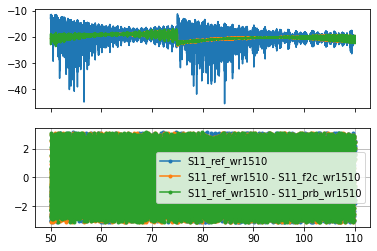

In [28]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True)

ax0.plot(freq_wr1510, ser.dB(S11_ref_wr1510), label="S11_ref_wr1510")
ax0.plot(freq_wr1510, ser.dB(S11_ref_wr1510 - S11_f2c_wr1510), label="S11_ref_wr1510 - S11_f2c_wr1510")
ax0.plot(freq_wr1510, ser.dB(S11_ref_wr1510 - S11_prb_wr1510), label="S11_ref_wr1510 - S11_prb_wr1510")

ax1.plot(freq_wr1510, np.angle(S11_ref_wr1510), '.-', label="S11_ref_wr1510")
ax1.plot(freq_wr1510, np.angle(S11_ref_wr1510 - S11_f2c_wr1510), '.-', label="S11_ref_wr1510 - S11_f2c_wr1510")
ax1.plot(freq_wr1510, np.angle(S11_ref_wr1510 - S11_prb_wr1510), '.-', label="S11_ref_wr1510 - S11_prb_wr1510")

plt.legend()
plt.grid()